<a href="https://colab.research.google.com/github/pavanthiriveedi7-rgb/Meachine_Learning_practice/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline


**Logistic regression** is one of the techinques used for **classification**

***Predicting if a person would buy life insurnace based on his age using logistic regression***

 **Binary Logistic Regression**

This is the most common form, used when the target variable has only two possible classes, typically labeled as 0 or 1, Yes or No, or True or False.

**Examples**: Predicting email spam (spam/not spam), credit card fraud detection (fraud/not fraud), or medical test results (positive/negative).

**Multinomial Logistic Regression**

Used when the target variable has three or more nominal categories (i.e., no inherent order or ranking).

**Examples**: Predicting the color of a product (Red/Blue/Green), classifying documents by topic (Politics/Sports/Tech), or selecting a preferred transport mode (Bus/Train/Car).

 **Ordinal Logistic Regression**

This type is employed when the target variable has three or more categories that possess a natural, inherent order or ranking.

**Examples**: Movie ratings (1 to 5 stars), survey responses (Disagree/Neutral/Agree), or education level (High School/Bachelor's/Master's/PhD).

In [ ]:
df = pd.read_csv('/content/insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


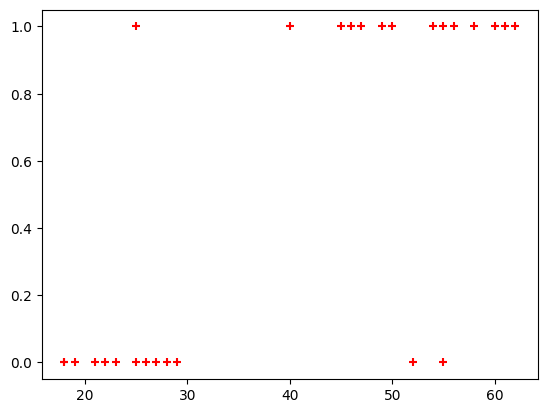

In [ ]:
plt.scatter(df['age'],df['bought_insurance'], marker = '+', c='red')

In [ ]:
df.shape

(27, 2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df['age'],df['bought_insurance'],train_size=0.9)

In [ ]:
x_train

,age
23,45
0,22
4,46
1,25
22,40
16,25
25,54
21,26
24,50
17,58


In [ ]:
x_test

,age
26,23
18,19
11,28


In [ ]:
y_train

,bought_insurance
23,1
0,0
4,1
1,0
22,1
16,1
25,1
21,0
24,1
17,1


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train.values.reshape(-1, 1), y_train)

LogisticRegression()

In [ ]:
model.predict(x_test.values.reshape(-1,1))

array([0, 0, 0])

In [ ]:
model.score(x_test.values.reshape(-1,1),y_test)

1.0

In [ ]:
model.predict_proba(x_test.values.reshape(-1,1))

array([[0.86097883, 0.13902117],
       [0.9105015 , 0.0894985 ],
       [0.76906359, 0.23093641]])

In [ ]:
model.predict([[52]])

array([1])

In [ ]:
model.predict_proba([[52]])

array([[0.144928, 0.855072]])

In [ ]:
model.predict([[99]])

array([1])

In [ ]:
model.predict_proba([[99]])

array([[4.9680009e-04, 9.9950320e-01]])


**model.coef_ indicates value of m in y=m*x + b equation**

In [ ]:
model.coef_

array([[0.1240825]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [ ]:
model.intercept_

array([-4.67734113])

Lets defined sigmoid function now and do the math with hand

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))    #  as sigma (x)={1}/{1+e^{-x}}

In [ ]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [ ]:
age = 35
prediction_function(age)

0.4850044983805899

0.485 is less than 0.5 which means person with 35 age will not buy insurance

In [ ]:
age = 43
prediction_function(age)

0.568565299077705

0.485 is more than 0.5 which means person with 43 will buy the insurance

In [ ]:
age = 99
prediction_function(age)

0.9326420163043319

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

Plot bar charts showing impact of employee salaries on retention

Plot bar charts showing corelation between department and employee retention

Now build logistic regression model using variables that were narrowed down

in step 1
Measure the accuracy of the model

In [ ]:
pk = pd.read_csv('/content/HR_comma_sep.csv')

In [43]:
pk

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [46]:
pk.shape

(14999, 10)

In [48]:
left = pk[pk.left==1]
left.shape

(3571, 10)

In [50]:
retained = pk[pk.left==0]
retained.shape

(11428, 10)

In [57]:
pk.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Impact of salary on employee retention

<Axes: xlabel='salary'>

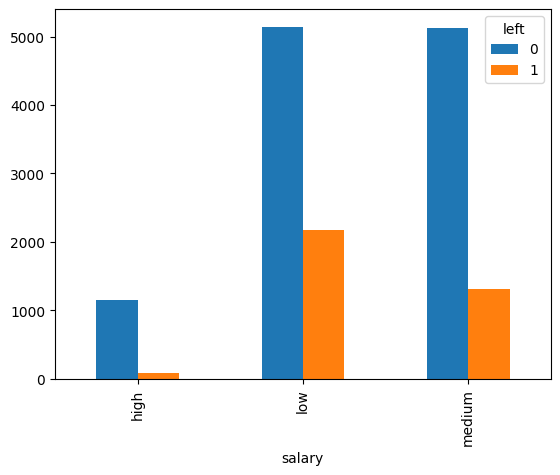

In [66]:
pd.crosstab(pk.salary,pk.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

Department wise employee retention rate

<Axes: xlabel='Department'>

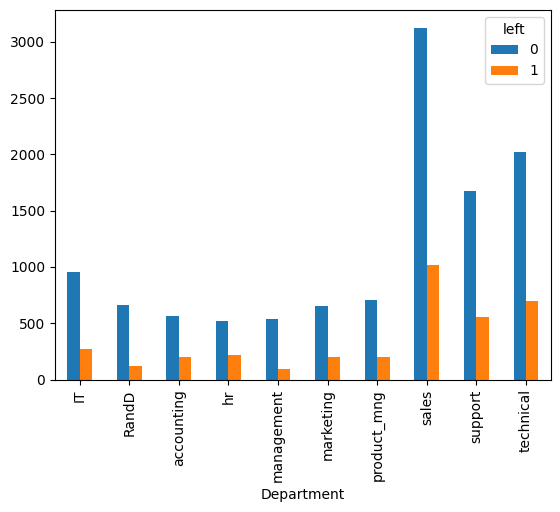

In [68]:
pd.crosstab(pk.Department,pk.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

From the data analysis so far we can conclude that we will use following variables as independant variables in our model

**Satisfaction Level**

**Average Monthly Hours**

**Promotion Last 5 Years**

**Salary**

In [73]:
subdf = pk[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and i will use dummy variable for that.

In [75]:
salary_dummies = pd.get_dummies(subdf.salary,prefix = 'salary')

In [76]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis = 'columns')

In [77]:
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,False,True,False
14995,0.37,160,0,low,False,True,False
14996,0.37,143,0,low,False,True,False
14997,0.11,280,0,low,False,True,False


In [78]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [79]:
df_with_dummies.drop('salary',axis = 'columns',inplace = True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [80]:
x = df_with_dummies
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,pk.left,train_size = 0.2)

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [84]:
model.fit(x_train,y_train)

LogisticRegression()

In [86]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
model.score(x_test,y_test)

0.7873333333333333

In [90]:
model.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
model.score(x_train,y_train)

0.7775925308436146

In [92]:
model.intercept_

array([0.04015357])

In [93]:
model.coef_

array([[-3.44950569e+00,  2.04105059e-03, -8.78783308e-01,
        -6.50066554e-01,  6.23580028e-01,  1.02218588e-01]])

In [94]:
model.predict_proba(x_train)

array([[0.90401281, 0.09598719],
       [0.79313714, 0.20686286],
       [0.9063079 , 0.0936921 ],
       ...,
       [0.7397566 , 0.2602434 ],
       [0.97963083, 0.02036917],
       [0.91070773, 0.08929227]])

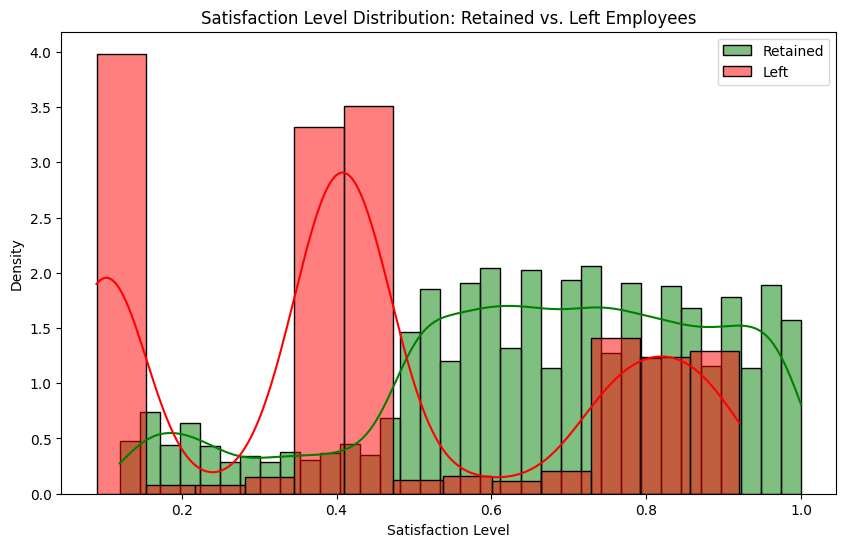

In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(pk[pk['left']==0]['satisfaction_level'], color='green', kde=True, label='Retained', stat='density', alpha=0.5)
sns.histplot(pk[pk['left']==1]['satisfaction_level'], color='red', kde=True, label='Left', stat='density', alpha=0.5)
plt.title('Satisfaction Level Distribution: Retained vs. Left Employees')
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')
plt.legend()
plt.show()